In [1]:
# DAL Library
# version 2.1

source("../examples.R")
source("../graphics.R")


#loading DAL
load_dal() # see ../examples.R 

Loading required package: dal


Attaching package: ‘dal’


The following object is masked from ‘package:stats’:

    optimize


The following objects are masked from ‘package:base’:

    jitter, transform




In [2]:
# functions for plotting
loadlibrary("RColorBrewer")
loadlibrary("dplyr")
loadlibrary("ggplot2")

#color palette
colors <- brewer.pal(3, 'Set1')

# This function is used only to set graphics size in this notebook. 
plot.size(10, 5)

# setting the font size for all charts
font <- theme(text = element_text(size=16))

Loading required package: RColorBrewer

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



In [3]:
# Dataset for example
iris <- datasets::iris
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## PCA
PCA is a technique that finds a projection that captures the largest amount of variation in data.

In [4]:
mypca <- dt_pca("Species")
mypca <- fit(mypca, datasets::iris)
iris.pca <- transform(mypca, iris)

## Properties of PCA

In [5]:
print(head(iris.pca))
print(head(mypca$pca.transf))

       PC1       PC2 Species
1 2.640270 -5.204041  setosa
2 2.670730 -4.666910  setosa
3 2.454606 -4.773636  setosa
4 2.545517 -4.648463  setosa
5 2.561228 -5.258629  setosa
6 2.975946 -5.707321  setosa
                    PC1         PC2
Sepal.Length  0.5210659 -0.37741762
Sepal.Width  -0.2693474 -0.92329566
Petal.Length  0.5804131 -0.02449161
Petal.Width   0.5648565 -0.06694199


## Visual analysis of PCA

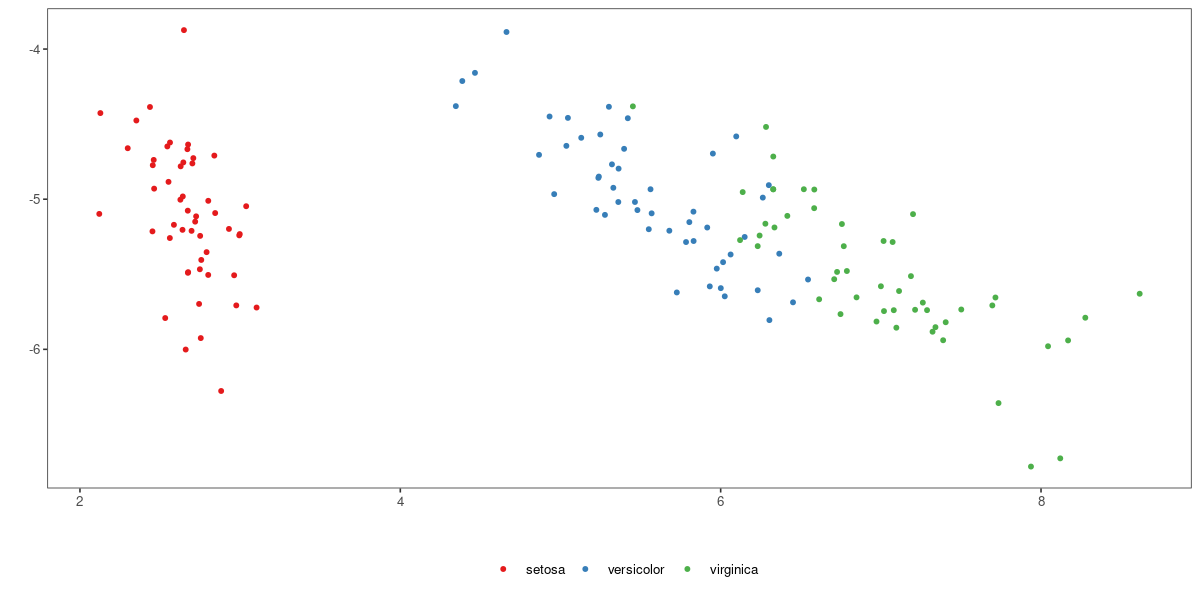

In [6]:
grf <- plot.scatter(iris.pca |> dplyr::select(x=PC1, value=PC2, variable=Species), colors=colors)
plot(grf)

In [7]:
# Manual establishment of number of components
mypca <- dt_pca("Species", 3)
mypca <- fit(mypca, datasets::iris)
iris.pca <- transform(mypca, iris)
print(head(iris.pca))
print(head(mypca$pca.transf))

       PC1       PC2      PC3 Species
1 2.640270 -5.204041 2.488621  setosa
2 2.670730 -4.666910 2.466898  setosa
3 2.454606 -4.773636 2.288321  setosa
4 2.545517 -4.648463 2.212378  setosa
5 2.561228 -5.258629 2.392226  setosa
6 2.975946 -5.707321 2.437245  setosa
                    PC1         PC2        PC3
Sepal.Length  0.5210659 -0.37741762  0.7195664
Sepal.Width  -0.2693474 -0.92329566 -0.2443818
Petal.Length  0.5804131 -0.02449161 -0.1421264
Petal.Width   0.5648565 -0.06694199 -0.6342727
